<a href="https://colab.research.google.com/github/ResearchMethodsGroupAssignment/Kaggle_Challenge_Team2/blob/main/Kaggle_team2_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('https://raw.githubusercontent.com/ResearchMethodsGroupAssignment/Kaggle_Challenge_Team2/main/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/ResearchMethodsGroupAssignment/Kaggle_Challenge_Team2/main/test.csv')

* **PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.**
* **HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.**
* **CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.**
* **Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.**
* **Destination - The planet the passenger will be debarking to.**
* **Age - The age of the passenger.**
* **VIP - Whether the passenger has paid for special VIP service during the voyage.**
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.**
* **Name - The first and last names of the passenger.**
* **Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.**

**STATISTICAL ANALYSIS**

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train_data.shape

(8693, 14)

In [5]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
test_data.shape

(4277, 13)

In [8]:
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


# Missing value check


In [9]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [11]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [12]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Basic Exploratory Data Analysis

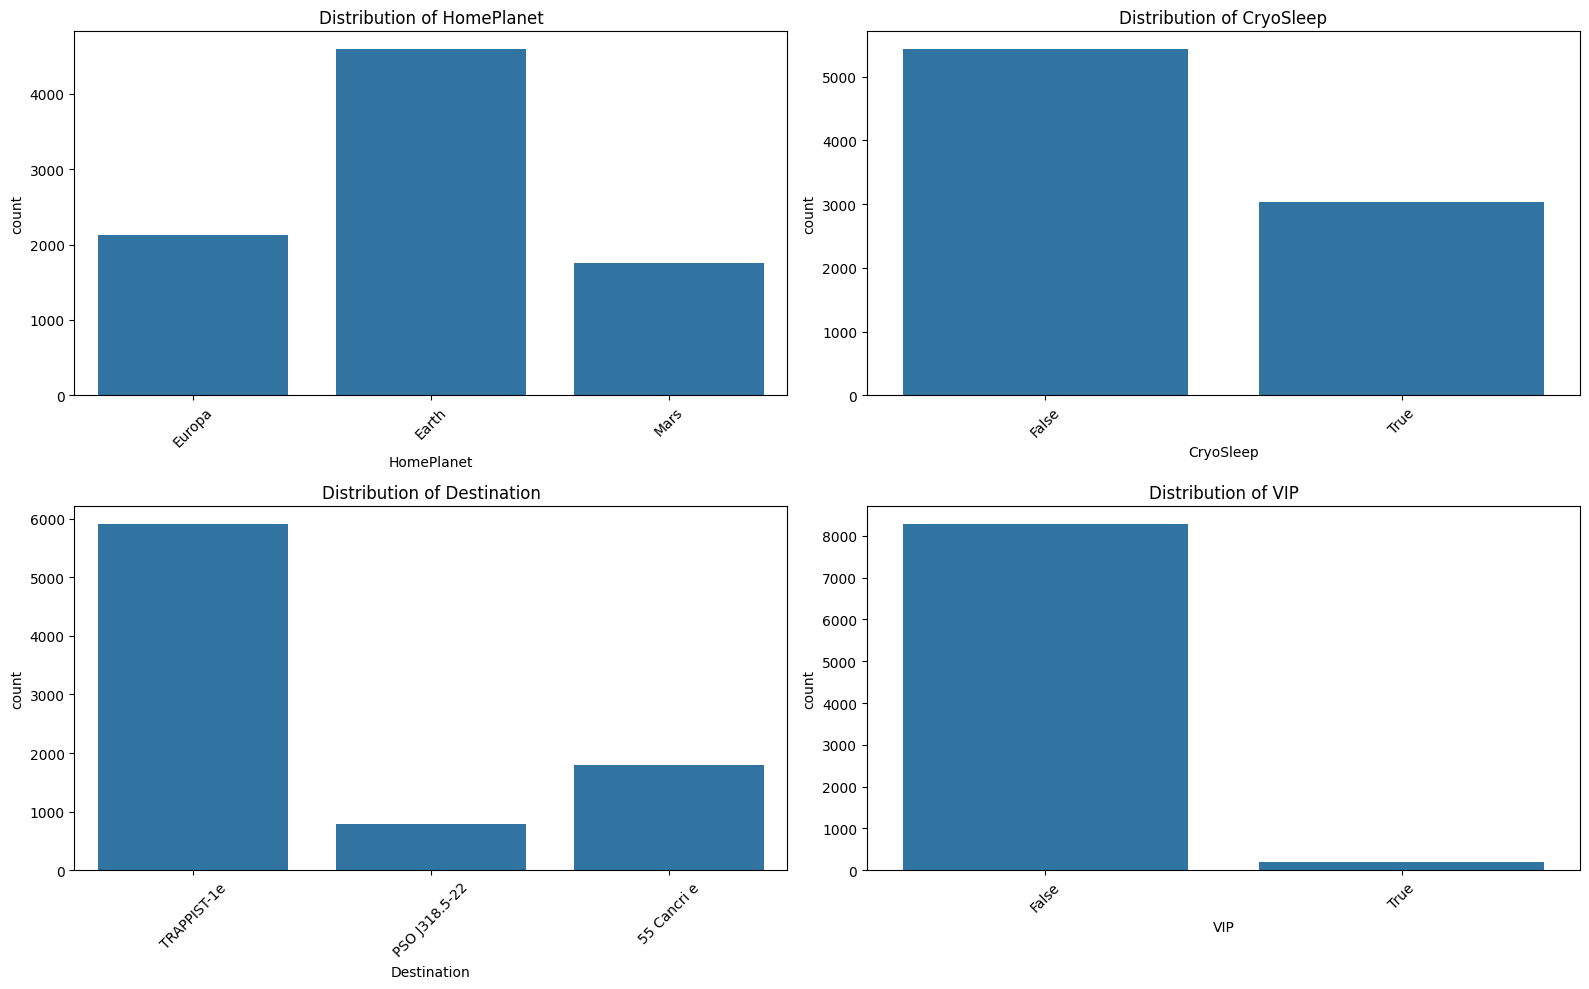

In [13]:
# Categorical Data Visualization
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

n_cols = 2  # Number of columns in subplot grid
n_rows = len(categorical_columns) // n_cols + (len(categorical_columns) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))

axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    # Plot on the ith subplot
    sns.countplot(x=column, data=train_data, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Above bar charts for HomePlanet, CryoSleep, Destination, and VIP status show that:
• Earth is the most common home planet among the passengers, followed by Europa and Mars.
• The majority of passengers were not in CryoSleep.
• The most popular destination is TRAPPIST-1e, far surpassing the other two destinations, PSO J318.5-22 and 55 Cancri e.
• Very few passengers have VIP status, indicating that this is an exclusive feature in the dataset.

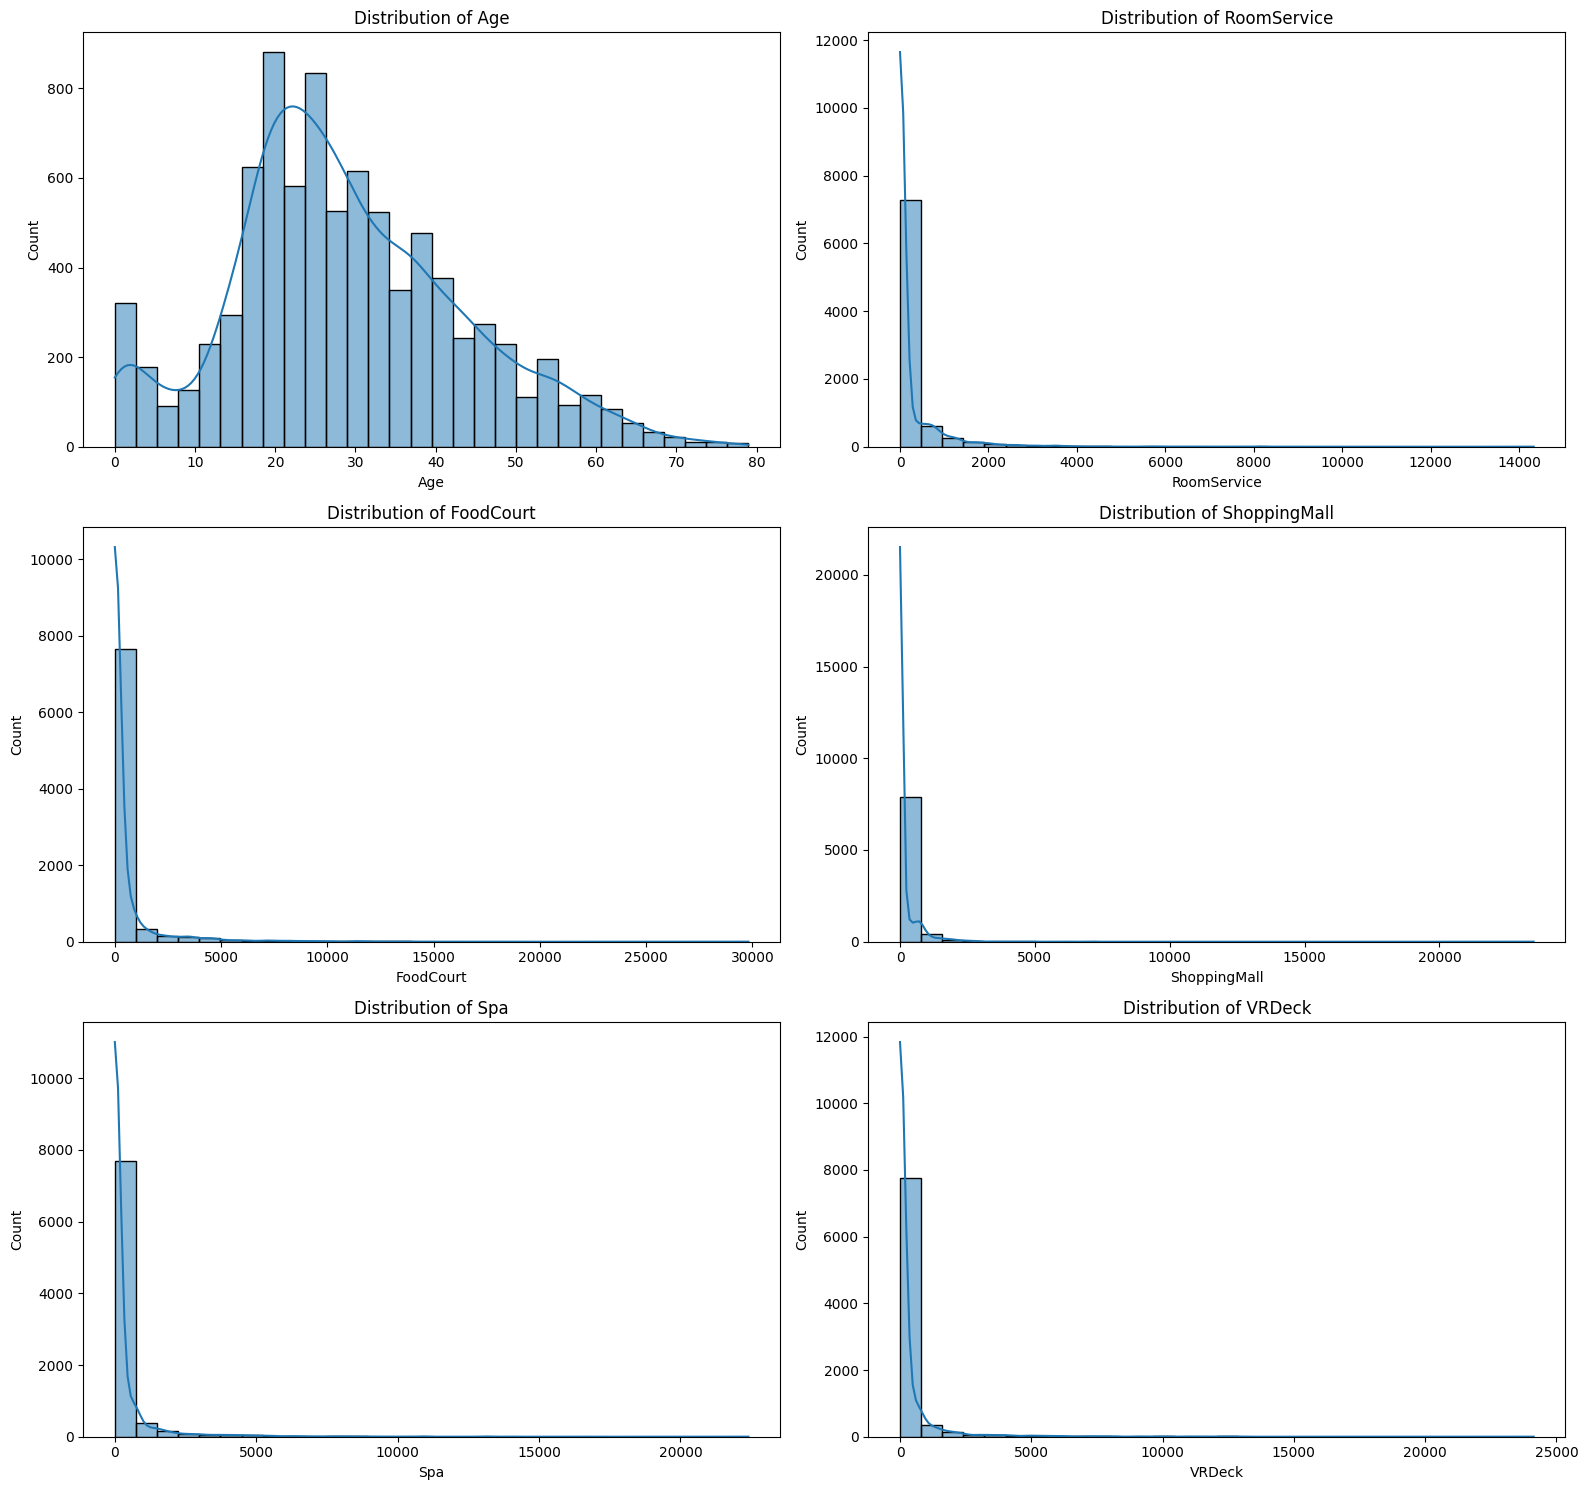

In [14]:
# Numerical Data Visualization
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

n_cols = 2  # Number of columns in subplot grid
n_rows = len(numerical_columns) // n_cols + (len(numerical_columns) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))

axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    # Plot on the ith subplot
    sns.histplot(train_data[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

<Axes: >

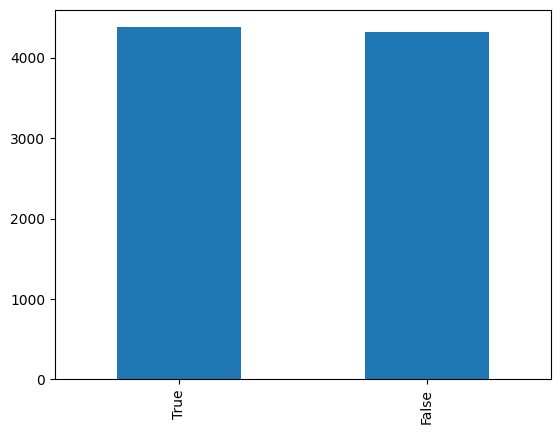

In [15]:
plot_df = train_data.Transported.value_counts()
plot_df.plot(kind="bar")

Advanced Ecploratory Data Analysis

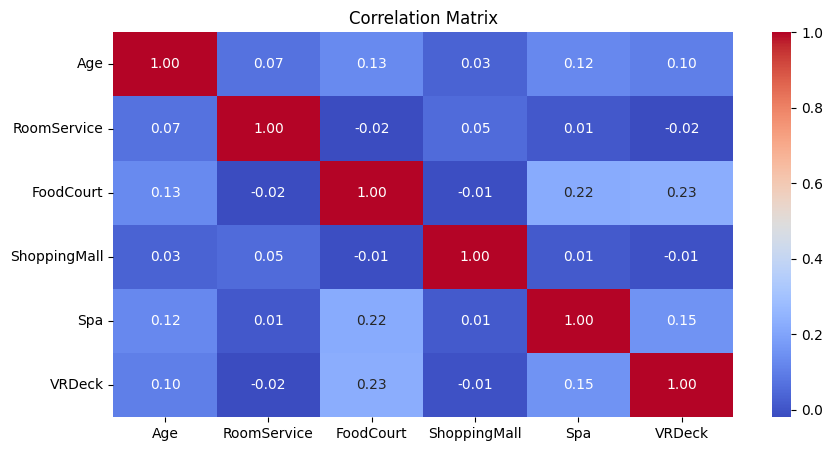

In [16]:
# Correlation Matrix and Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(train_data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

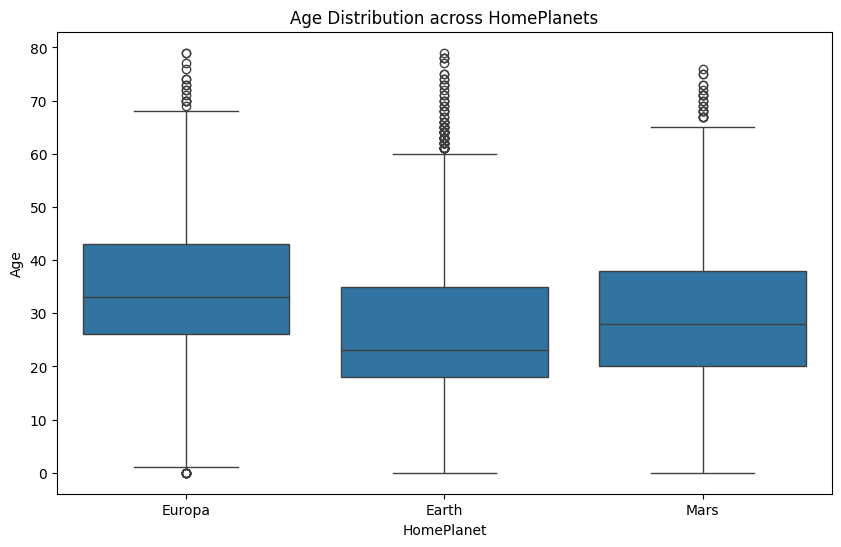

In [17]:
# Box Plot for Age across HomePlanets
plt.figure(figsize=(10, 6))
sns.boxplot(x='HomePlanet', y='Age', data=train_data)
plt.title('Age Distribution across HomePlanets')
plt.show()

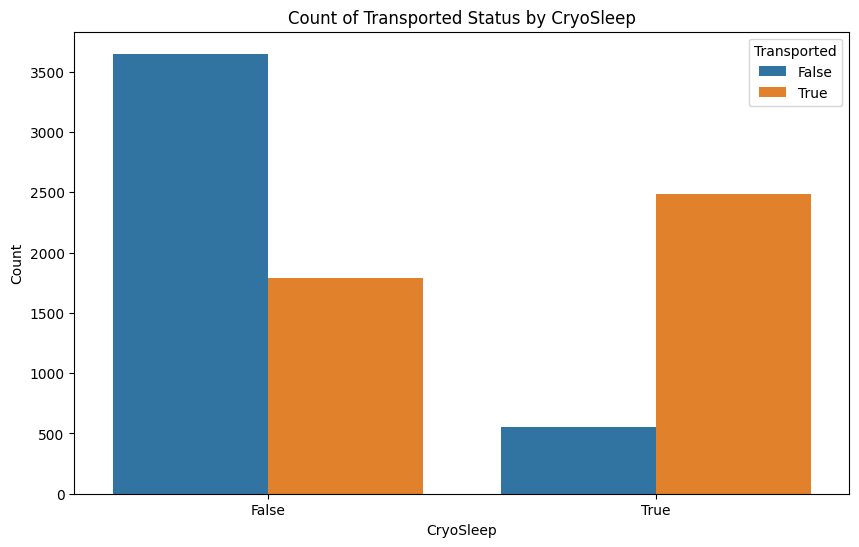

In [18]:
# Create a count plot with CryoSleep status and Transported status
plt.figure(figsize=(10, 6))
sns.countplot(x='CryoSleep', hue='Transported', data=train_data)
plt.title('Count of Transported Status by CryoSleep')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.legend(title='Transported')
plt.show()

FEATURE ENGINEERING FOR TRAIN DATA

In [19]:
# Extract group size from PassengerId
train_data['GroupSize'] = train_data['PassengerId'].str.split('_', expand=True)[0].astype(int)

# Binning Age into groups
bins = [0, 12, 18, 60, 100]  # Example age groups
labels = ['Child', 'Teen', 'Adult', 'Senior']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)

# Creating a new feature TotalSpent as the sum of all amenities expenditures
amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_data['TotalSpent'] = train_data[amenities].sum(axis=1)

# Create a feature that represents being non-VIP as a baseline
train_data['NonVIP'] = (train_data['VIP'] == False).astype(int)

#To remove outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Example: Capping outliers in 'Age' for 'Europa' passengers in train_data
train_data_filtered = cap_outliers(train_data[train_data['HomePlanet'] == 'Europa'], 'Age')

<ipython-input-19-60061af9bdf3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
<ipython-input-19-60061af9bdf3>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])


FEATURE ENGINEERING FOR TEST DATA

In [20]:
# Extract group size from PassengerId
test_data['GroupSize'] = test_data['PassengerId'].str.split('_', expand=True)[0].astype(int)

# Binning Age into groups
bins = [0, 12, 18, 60, 100]  # Example age groups
labels = ['Child', 'Teen', 'Adult', 'Senior']
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins=bins, labels=labels, right=False)

# Creating a new feature TotalSpent as the sum of all amenities expenditures
amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
test_data['TotalSpent'] = test_data[amenities].sum(axis=1)

# Assuming the VIP feature is very imbalanced
# Create a feature that represents being non-VIP as a baseline
test_data['NonVIP'] = (test_data['VIP'] == False).astype(int)

#To remove outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Example: Capping outliers in 'Age' for 'Europa' passengers in test_data
test_data_filtered = cap_outliers(test_data[test_data['HomePlanet'] == 'Europa'], 'Age')

<ipython-input-20-08470cdfe471>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
<ipython-input-20-08470cdfe471>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])


**Handling missing values with Imputation**

In [ ]:
#Handling missing values
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Multivariate imputation for numerical columns
iterative_imputer = IterativeImputer()
train[numerical_columns] = iterative_imputer.fit_transform(train[numerical_columns])
test[numerical_columns] = iterative_imputer.transform(test[numerical_columns])

# Categorical imputation
imputer = SimpleImputer(strategy='most_frequent')
train[categorical_columns] = imputer.fit_transform(train[categorical_columns])
# Use the same imputer that was fitted on the train_data for categorical columns as well
test[categorical_columns] = imputer.transform(test[categorical_columns])

#Splitting the Cabin field
train[['Deck','Num','Side']]= train['Cabin'].str.split('/',expand=True,)
test[['Deck','Num','Side']]= test['Cabin'].str.split('/',expand=True,)

#imputing Deck, Num, Side
for column in ['Deck', 'Num', 'Side']:
    imputer = SimpleImputer(strategy='most_frequent')
    train[column] = imputer.fit_transform(train[[column]])
    test[column] = imputer.transform(test[[column]])

# At this point, you can choose to drop the original 'Cabin' column if it's no longer needed
train = train.drop(columns=['Cabin','Name'])
test = test.drop(columns=['Cabin','Name'])

#One hot encoding

In [ ]:
# Columns to encode
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

# Applying one-hot encoding
train_data_encoded = pd.get_dummies(train, columns=categorical_columns)
test_data_encoded = pd.get_dummies(test, columns=categorical_columns)


In [ ]:
train_data_encoded.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,False,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,True,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,True,1,1,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
test_data_encoded.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,HomePlanet_Earth,HomePlanet_Europa,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0013_01,27.0,0.0,0.0,0.0,0.0,0.0,3,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,4,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0019_01,31.0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0023_01,20.0,10.0,0.0,635.0,0.0,0.0,5,1,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
train_data_encoded.isnull().sum()

PassengerId                  0
Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Num                          0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
dtype: int64

In [ ]:
test_data_encoded.isnull().sum()

PassengerId                  0
Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Num                          0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
dtype: int64

**Visualising after Data cleaning and One hot encoding**

<ipython-input-316-6df3261150e5>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data_encoded.corr()


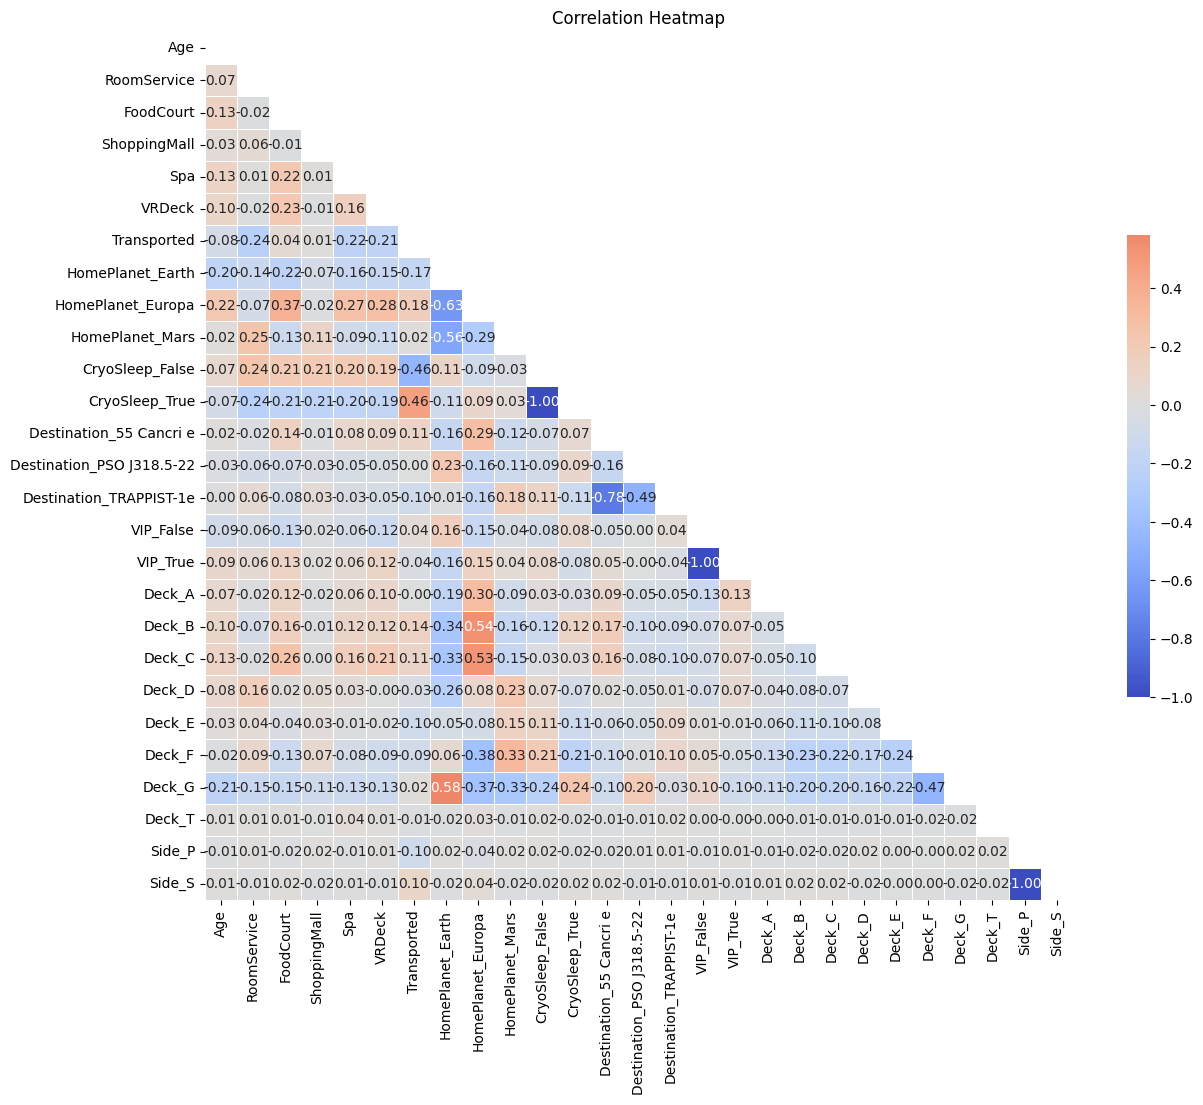

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that 'data_encoded' is your DataFrame after one-hot encoding
# Calculate the correlation matrix including the target variable
correlation_matrix = train_data_encoded.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')

# It may be useful to add title and adjust ticks for clarity, depending on the number of features
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

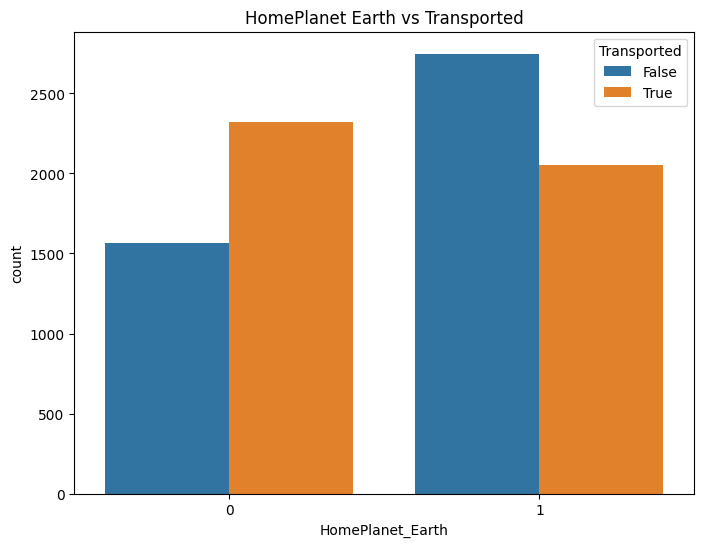

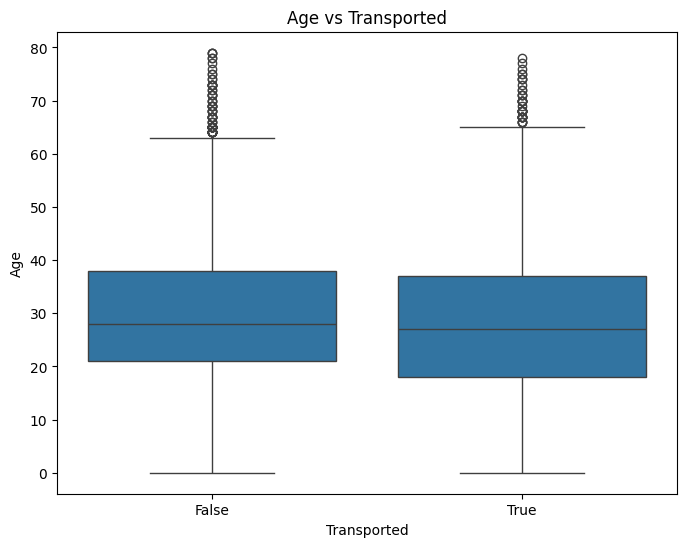

In [ ]:
# For a categorical feature 'HomePlanet_Earth'
plt.figure(figsize=(8, 6))
sns.countplot(x='HomePlanet_Earth', hue='Transported', data=train_data_encoded)
plt.title('HomePlanet Earth vs Transported')
plt.show()

# For a numerical feature 'Age'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transported', y='Age', data=train_data_encoded)
plt.title('Age vs Transported')
plt.show()


In [ ]:
train_data_encoded.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,False,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,True,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,True,1,1,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
test_data_encoded.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,HomePlanet_Earth,HomePlanet_Europa,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0013_01,27.0,0.0,0.0,0.0,0.0,0.0,3,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,4,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0019_01,31.0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0023_01,20.0,10.0,0.0,635.0,0.0,0.0,5,1,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
train_data_output = train_data_encoded.copy()
train_data_output

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,False,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,True,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,True,1,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,False,98,0,...,1,0,0,0,0,0,0,0,1,0
8689,9278_01,18.0,0.0,0.0,0.0,0.0,0.0,False,1499,1,...,0,0,0,0,0,0,1,0,0,1
8690,9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,True,1500,1,...,0,0,0,0,0,0,1,0,0,1
8691,9280_01,32.0,0.0,1049.0,0.0,353.0,3235.0,False,608,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
test_data_output = test_data_encoded.copy()
test_data_output

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,HomePlanet_Earth,HomePlanet_Europa,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0013_01,27.000000,0.0,0.0,0.0,0.0,0.0,3,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0018_01,19.000000,0.0,9.0,0.0,2823.0,0.0,4,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0019_01,31.000000,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0021_01,38.000000,0.0,6652.0,0.0,181.0,585.0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0023_01,20.000000,10.0,0.0,635.0,0.0,0.0,5,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,34.000000,0.0,0.0,0.0,0.0,0.0,1496,1,0,...,0,0,0,0,0,0,1,0,0,1
4273,9269_01,42.000000,0.0,847.0,17.0,10.0,144.0,82,1,0,...,0,0,0,0,0,1,0,0,0,1
4274,9271_01,27.349953,0.0,0.0,0.0,0.0,0.0,296,0,0,...,0,0,0,1,0,0,0,0,1,0
4275,9273_01,30.137341,0.0,2680.0,0.0,0.0,523.0,297,0,1,...,0,0,0,1,0,0,0,0,1,0


# Creating a model

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#Need to use encoded dataset
identifiers_train = train_data_encoded[['PassengerId', 'Num']]
X = train_data_encoded.drop(['Transported','PassengerId', 'Num'],axis=1)
y = train_data_encoded['Transported']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [ ]:
RF = RandomForestClassifier(random_state=42)
LGR = LogisticRegression()
KNN = KNeighborsClassifier()
SVM = SVC()
NB = GaussianNB()

# Random forest classifier

In [ ]:
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
pred_RF = RF.predict(X_test)

In [ ]:
confusion_matrix(y_test,pred_RF)

array([[870, 212],
       [264, 828]])

In [ ]:
print(f'accuracy : {accuracy_score(y_test,pred_RF)}')

accuracy : 0.781048758049678


#Logistic Regression

In [ ]:
LGR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred_LGR = LGR.predict(X_test)

In [ ]:
confusion_matrix(y_test,pred_LGR)

array([[813, 269],
       [208, 884]])

In [ ]:
print(f'accuracy : {accuracy_score(y_test,pred_LGR)}')

accuracy : 0.7805887764489421


# K neighbour Classifier

In [ ]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
pred_KNN = KNN.predict(X_test)

In [ ]:
confusion_matrix(y_test,pred_KNN)

array([[819, 263],
       [234, 858]])

In [ ]:
print(f'accuracy : {accuracy_score(y_test,pred_KNN)}')

accuracy : 0.7713891444342227


# Support vector machine

In [ ]:
SVM.fit(X_train, y_train)

SVC()

In [ ]:
pred_SVM = SVM.predict(X_test)

In [ ]:
confusion_matrix(y_test,pred_SVM)

array([[730, 352],
       [134, 958]])

In [ ]:
print(f'accuracy : {accuracy_score(y_test,pred_SVM)}')

accuracy : 0.7764489420423183


#XG Boost

In [ ]:
# Initialize XGBoost classifier
xgb_classifier = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42, enable_categorical=True
)

In [ ]:
# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict the labels for the test set
xgb_pred = xgb_classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test,xgb_pred)

array([[827, 255],
       [196, 896]])

In [ ]:
print(f'accuracy : {accuracy_score(y_test,xgb_pred)}')

accuracy : 0.7925482980680773


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint as sp_randint


# Define a smaller set of parameters to test
param_dist = {'n_estimators': sp_randint(100, 300),'learning_rate': [0.01, 0.05, 0.1],'max_depth': sp_randint(3, 6),'subsample': [0.8, 0.9, 1.0],
}

# Initialize the RandomizedSearchCV object with a fixed number of iterations
random_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters it found
print("Best parameters set found on development set:")
print(random_search.best_params_)

# Use the best model found by RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions with the best model
GB_y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, GB_y_pred)
print(f"Accuracy with hyperparameter tuning: {accuracy:.4f}")

Best parameters set found on development set:
{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 137, 'subsample': 0.9}
Accuracy with hyperparameter tuning: 0.7935


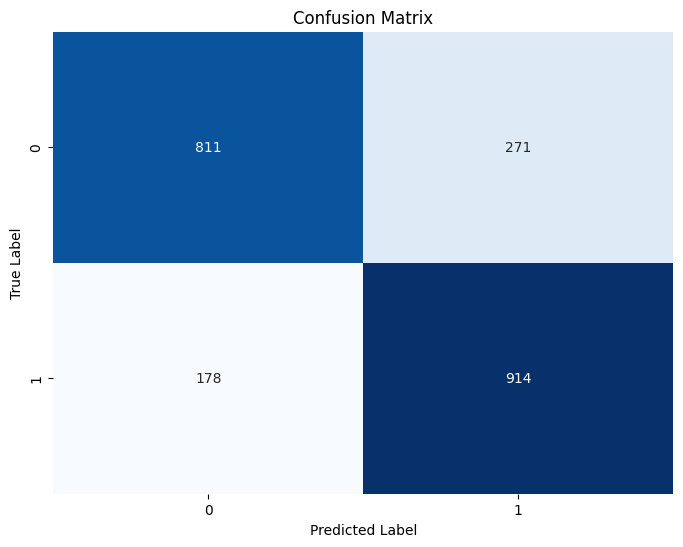

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, GB_y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print the classification report
print(classification_report(y_test, GB_y_pred))

              precision    recall  f1-score   support

       False       0.82      0.75      0.78      1082
        True       0.77      0.84      0.80      1092

    accuracy                           0.79      2174
   macro avg       0.80      0.79      0.79      2174
weighted avg       0.80      0.79      0.79      2174



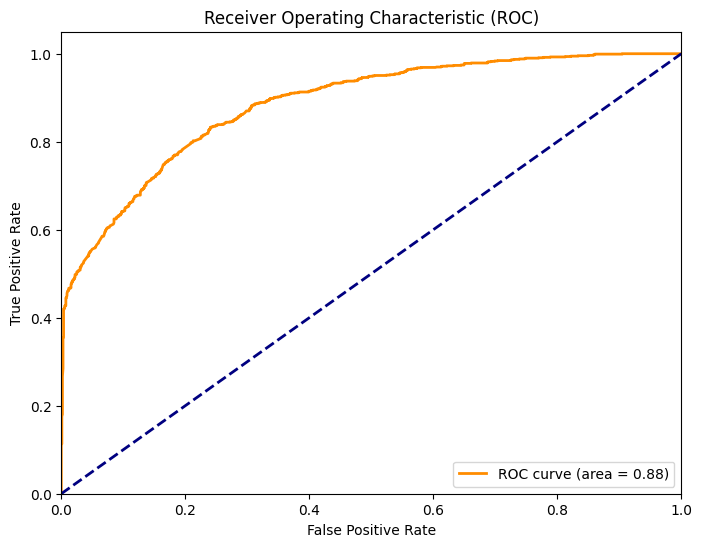

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Plotting Shapley values

In [ ]:
!pip install shap

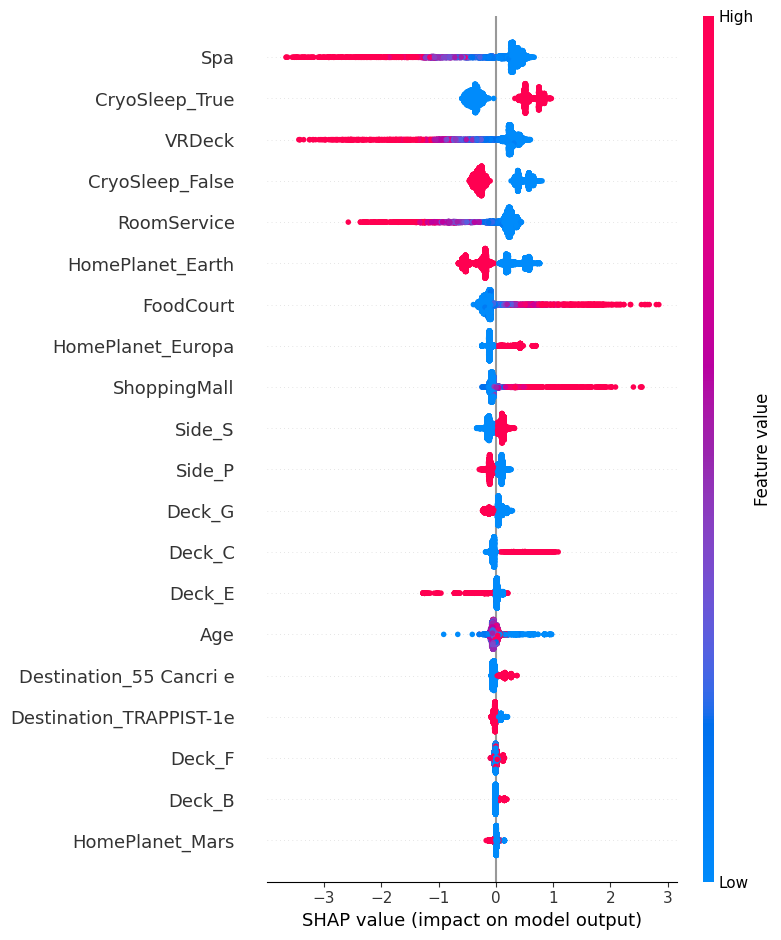

In [ ]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)

# Plot the SHAP values
shap.summary_plot(shap_values, X_train)

# Naive bayes classifier

In [ ]:
NB.fit(X_train, y_train)
pred_NB = NB.predict(X_test)

In [ ]:
confusion_matrix(y_test,pred_NB)

In [ ]:
print(f'accuracy : {accuracy_score(y_test,pred_NB)}')

# Evaluation

The best model is Random forest classifier because it has better accuracy

In [ ]:
# Assume `predictions` is a numpy array or list containing your model's predictions
predictions_series = pd.Series(predictions, name='Predicted')

# Combine the identifiers with the predictions
test_data_with_predictions = pd.concat([identifiers_test, predictions_series], axis=1)


In [ ]:
test_data_output = test_data_output.drop(['PassengerId', 'Num'])

In [ ]:
pred = best_model.predict(test_data_output)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Num
- PassengerId


In [ ]:
sample = pd.read_csv('https://raw.githubusercontent.com/ResearchMethodsGroupAssignment/Kaggle_Challenge_Team2/main/test.csv')

In [ ]:
id = sample['PassengerId']

In [ ]:
output = pd.DataFrame({'PassengerId': id, 'Transported': pred})

In [ ]:
output['Transported'] = output['Transported'].map({0: 'False', 1: 'True'})

In [ ]:
output.to_csv('submission.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
output.to_csv('/content/drive/MyDrive/submission.csv',index=False)